In [44]:
import pandas as pd

In [45]:
import numpy as np

In [46]:
import matplotlib.pyplot as plt

In [47]:
import seaborn as sns

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [52]:
from sklearn.metrics import mean_squared_error,r2_score

In [53]:
sales=pd.read_csv('advertising.csv')
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [54]:
sales.shape

(200, 4)

In [55]:
sales.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [56]:
sales.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [57]:
sales.size

800

In [58]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [59]:
sales.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [60]:
sales.duplicated().sum()

0

In [61]:
sales.count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [62]:
corr_matrix=sales.corr()
corr_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x27d309808d0>,
 'caps': [<matplotlib.lines.Line2D at 0x27d30981c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x27d30963f50>,
 'medians': [<matplotlib.lines.Line2D at 0x27d30982cd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x27d30983510>,
 'means': []}

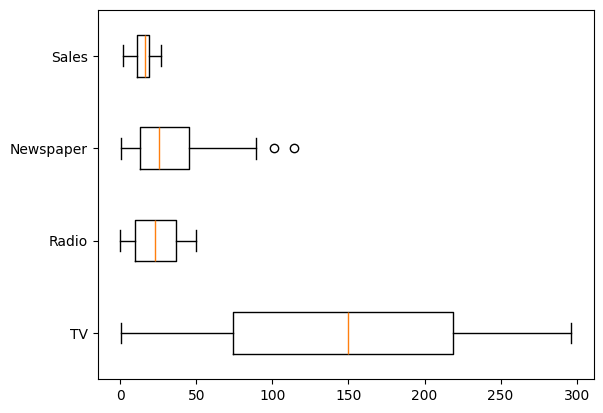

In [63]:
plt.boxplot(sales,vert=False,data=sales,labels=sales.columns)

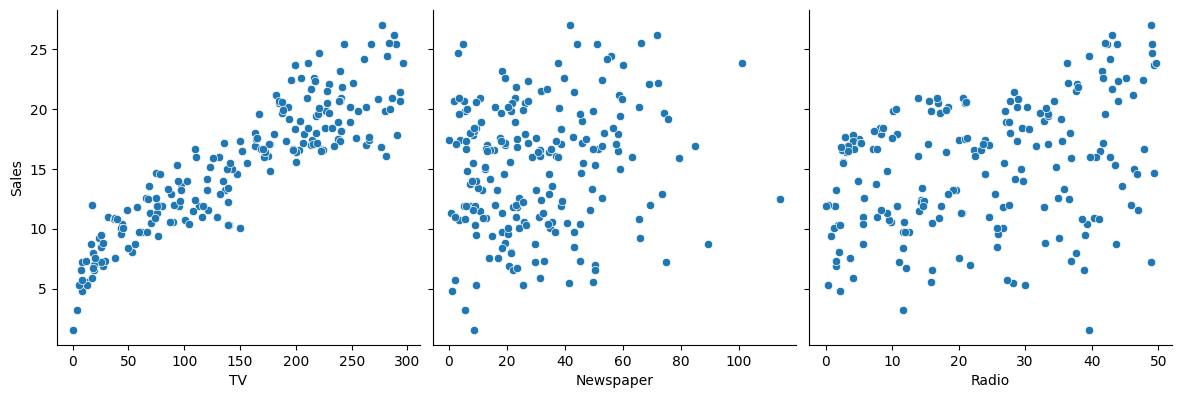

In [64]:
sns.pairplot(sales, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

C:\Users\Anushka Singh\AppData\Local\Temp\ipykernel_11764\3974244212.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

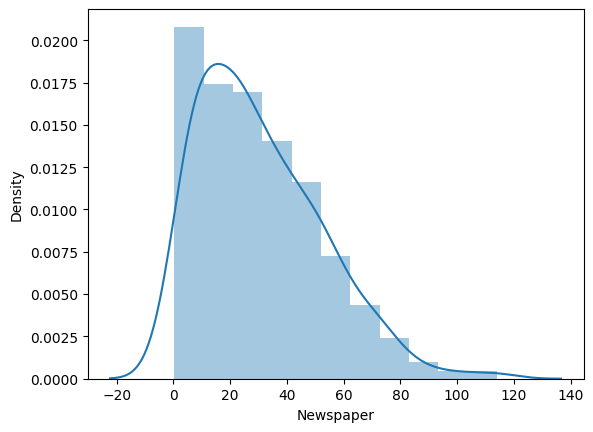

In [65]:
sns.distplot(sales['Newspaper'])

C:\Users\Anushka Singh\AppData\Local\Temp\ipykernel_11764\1073848177.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Radio'])


<Axes: xlabel='Radio', ylabel='Density'>

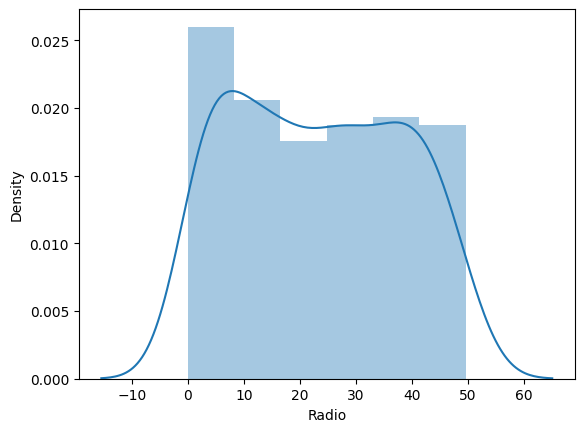

In [66]:
sns.distplot(sales['Radio'])

C:\Users\Anushka Singh\AppData\Local\Temp\ipykernel_11764\2473132392.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['TV'])


<Axes: xlabel='TV', ylabel='Density'>

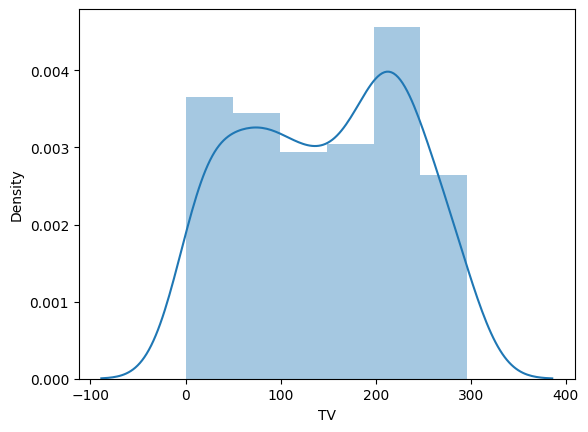

In [67]:
sns.distplot(sales['TV'])

C:\Users\Anushka Singh\AppData\Local\Temp\ipykernel_11764\2654211332.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

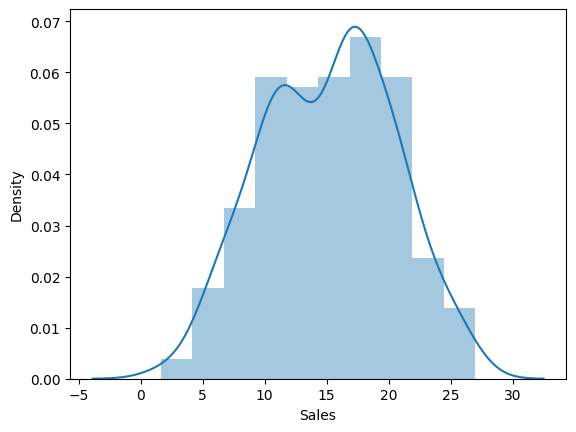

In [68]:
sns.distplot(sales['Sales'])

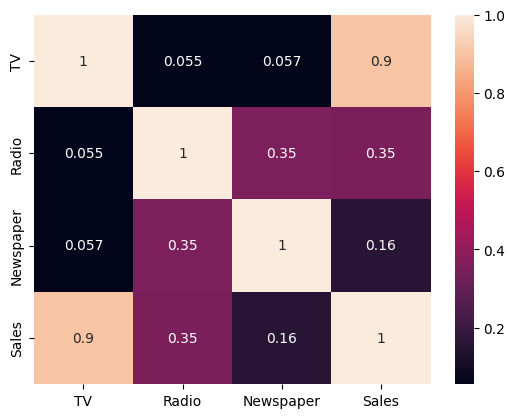

In [69]:
sns.heatmap(corr_matrix,annot=True)
plt.show()

<Axes: >

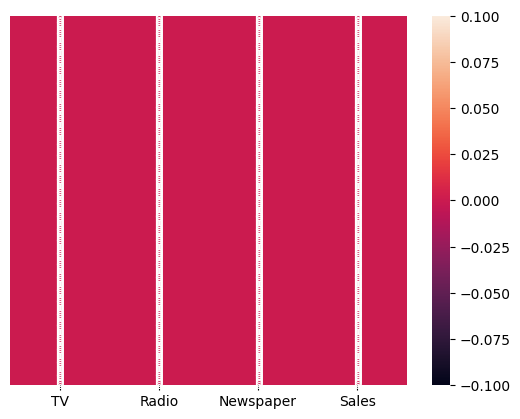

In [70]:
sns.heatmap(sales.isnull(),yticklabels=False,annot=True)

In [71]:
x=sales[['Newspaper','TV','Radio']]
y=sales['Sales']

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
x_train,y_train

(     Newspaper     TV  Radio
 79        23.1  116.0    7.7
 197        6.4  177.0    9.3
 38        35.1   43.1   26.7
 24        18.3   62.3   12.6
 122       15.6  224.0    2.4
 ..         ...    ...    ...
 106       29.7   25.0   11.0
 14        46.0  204.1   32.9
 92        59.0  217.7   33.5
 179       17.6  165.6   10.0
 102       21.4  280.2   10.1
 
 [160 rows x 3 columns],
 79     11.0
 197    14.8
 38     10.1
 24      9.7
 122    16.6
        ... 
 106     7.2
 14     19.0
 92     19.4
 179    17.6
 102    19.8
 Name: Sales, Length: 160, dtype: float64)

In [74]:
x_test,y_test

(     Newspaper     TV  Radio
 95        52.9  163.3   31.6
 15        52.9  195.4   47.7
 30        43.2  292.9   28.3
 158       45.2   11.7   36.9
 128        3.2  220.3   49.0
 115       52.7   75.1   35.0
 69        27.2  216.8   43.9
 170       18.4   50.0   11.6
 174       13.1  222.4    3.4
 45        31.5  175.1   22.5
 66         2.2   31.5   24.6
 182       29.7   56.2    5.7
 165       84.8  234.5    3.4
 78         9.4    5.4   29.9
 186       26.6  139.5    2.1
 177       35.2  170.2    7.8
 56        41.4    7.3   28.1
 152       14.2  197.6   23.3
 82        32.5   75.3   20.3
 68        11.0  237.4   27.5
 124       74.2  229.5   32.3
 16       114.0   67.8   36.6
 148       11.9   38.0   40.3
 93        72.3  250.9   36.5
 65         0.9   69.0    9.3
 60        21.4   53.5    2.0
 84        33.8  213.5   43.0
 67        10.2  139.3   14.5
 125       25.9   87.2   11.8
 132        2.1    8.4   27.2
 9         21.2  199.8    2.6
 18        18.3   69.2   20.5
 55       

In [75]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [76]:
y_predict=model.predict(x_test)

In [77]:
mse=mean_squared_error(y_test,y_predict)
mse

2.9077569102710905

In [78]:
rmse=mean_squared_error(y_test,y_predict,squared=False)
rmse

1.7052146229349228

In [79]:
r2=r2_score(y_test,y_predict)
r2

0.9059011844150826

In [80]:
random=RandomForestRegressor(random_state=42)

In [81]:
random.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [82]:
y_predict=random.predict(x_test)

In [83]:
mse=mean_squared_error(y_test,y_predict)
mse

1.4268856499999998

In [84]:
rmse=mean_squared_error(y_test,y_predict,squared=False)
rmse

1.194523189393994

In [85]:
r2=r2_score(y_test,y_predict)
r2

0.9538241146755293

In [86]:
y_pred=model.predict(x_test)
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])